In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import test_partial
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2022-02-23 00:35:52.288579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 00:35:52.288615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data1 = np.loadtxt("../data/Unioncom/MMD/s1_mapped1.txt")
data2 = np.loadtxt("../data/Unioncom/MMD/s1_mapped2.txt")
type1 = np.loadtxt("../data/Unioncom/MMD/s1_type1.txt")
type2 = np.loadtxt("../data/Unioncom/MMD/s1_type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)
type_func = lambda x: x

# ComManDo Partial

use random seed: 666
Shape of Raw data
Dataset 0: (300, 2000)
Dataset 1: (300, 1000)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:4.5494 alpha:0.7759
epoch:[200/2000] err:2.8128 alpha:0.5134
epoch:[300/2000] err:2.7323 alpha:0.5466
epoch:[400/2000] err:2.4531 alpha:0.5767
epoch:[500/2000] err:1.9160 alpha:0.6219
epoch:[600/2000] err:1.6819 alpha:0.6526
epoch:[700/2000] err:1.5806 alpha:0.6709
epoch:[800/2000] err:1.4751 alpha:0.6851
epoch:[900/2000] err:1.3157 alpha:0.6997
epoch:[1000/2000] err:1.2072 alpha:0.7121
epoch:[1100/2000] err:1.1563 alpha:0.7209
epoch:[1200/2000] err:1.1283 alpha:0.7277
epoch:[1300/2000] err:1.1095 alpha:0.7334
epoch:[1400/2000] err:1.0952 alpha:0.7383
epoch:[1500/2000] err:1.0835 alpha:0.7428
epoch:[1600/2000] err:1.0733 alpha:0.7468
epoch:[1700/2000] err:1.0644 alpha:0.7504
epoch:[1800/2000] err:1.0563 alpha:0.7536
epoch:[1900/2000] err:1.0488 alpha:0.7566
epoch:[2000/2000] err:1.0416

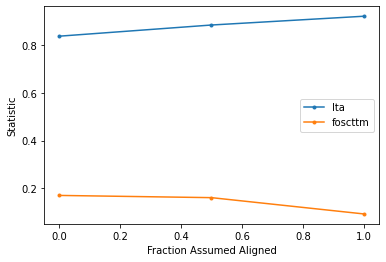

In [4]:
test_partial([data1,data2], [type1,type2]);

# ComManDo Aligned

In [5]:
cm = ComManDo()
cm_data = cm.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (300, 2000)
Dataset 1: (300, 1000)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:4.5494 alpha:0.7759
epoch:[200/2000] err:2.8128 alpha:0.5134
epoch:[300/2000] err:2.7323 alpha:0.5466
epoch:[400/2000] err:2.4531 alpha:0.5767
epoch:[500/2000] err:1.9160 alpha:0.6219
epoch:[600/2000] err:1.6819 alpha:0.6526
epoch:[700/2000] err:1.5806 alpha:0.6709
epoch:[800/2000] err:1.4751 alpha:0.6851
epoch:[900/2000] err:1.3157 alpha:0.6997
epoch:[1000/2000] err:1.2072 alpha:0.7121
epoch:[1100/2000] err:1.1563 alpha:0.7209
epoch:[1200/2000] err:1.1283 alpha:0.7277
epoch:[1300/2000] err:1.1095 alpha:0.7334
epoch:[1400/2000] err:1.0952 alpha:0.7383
epoch:[1500/2000] err:1.0835 alpha:0.7428
epoch:[1600/2000] err:1.0733 alpha:0.7468
epoch:[1700/2000] err:1.0644 alpha:0.7504
epoch:[1800/2000] err:1.0563 alpha:0.7536
epoch:[1900/2000] err:1.0488 alpha:0.7566
epoch:[2000/2000] err:1.0416

label transfer accuracy: 0.92
foscttm: 0.09367777777777778
Inter-label distances ([0, 1, 2]):
[[0.       4.253722 4.474163]
 [4.253722 0.       4.595545]
 [4.474163 4.595545 0.      ]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


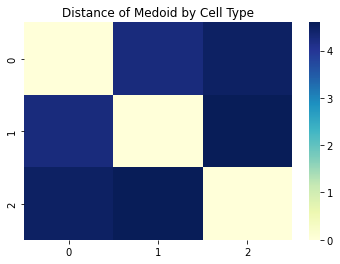

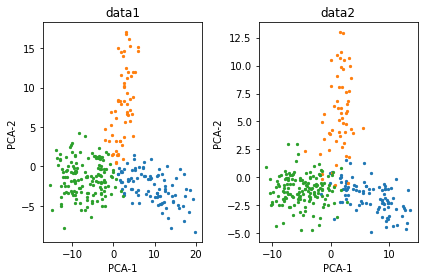

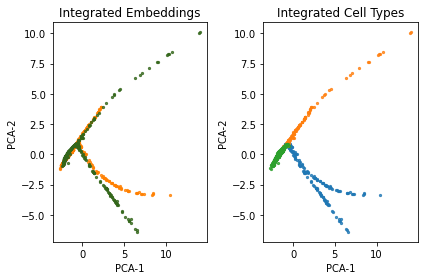

In [6]:
cm.test_LabelTA(cm_data, [type1,type2])
cm.test_closer(cm_data)
l,d = cm.test_label_dist(cm_data, [type1,type2])

l = [type_func(i) for i in l]
ax = sns.heatmap(d, xticklabels=l, yticklabels=l, linewidth=0, cmap='YlGnBu')
plt.title('Distance of Medoid by Cell Type')
cm.Visualize([data1,data2], cm_data, [type1,type2], mode='PCA')

# UnionCom Unaligned

In [7]:
uc = ComManDo(project_mode='tsne')
uc_data = uc.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (300, 2000)
Dataset 1: (300, 1000)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:4.5494 alpha:0.7759
epoch:[200/2000] err:2.8128 alpha:0.5134
epoch:[300/2000] err:2.7323 alpha:0.5466
epoch:[400/2000] err:2.4531 alpha:0.5767
epoch:[500/2000] err:1.9160 alpha:0.6219
epoch:[600/2000] err:1.6819 alpha:0.6526
epoch:[700/2000] err:1.5806 alpha:0.6709
epoch:[800/2000] err:1.4751 alpha:0.6851
epoch:[900/2000] err:1.3157 alpha:0.6997
epoch:[1000/2000] err:1.2072 alpha:0.7121
epoch:[1100/2000] err:1.1563 alpha:0.7209
epoch:[1200/2000] err:1.1283 alpha:0.7277
epoch:[1300/2000] err:1.1095 alpha:0.7334
epoch:[1400/2000] err:1.0952 alpha:0.7383
epoch:[1500/2000] err:1.0835 alpha:0.7428
epoch:[1600/2000] err:1.0733 alpha:0.7468
epoch:[1700/2000] err:1.0644 alpha:0.7504
epoch:[1800/2000] err:1.0563 alpha:0.7536
epoch:[1900/2000] err:1.0488 alpha:0.7566
epoch:[2000/2000] err:1.0416

label transfer accuracy: 0.9166666666666666
foscttm: 0.10983333333333334
Inter-label distances ([0, 1, 2]):
[[ 0.         8.769886  17.21443  ]
 [ 8.769886   0.        14.7267885]
 [17.21443   14.7267885  0.       ]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


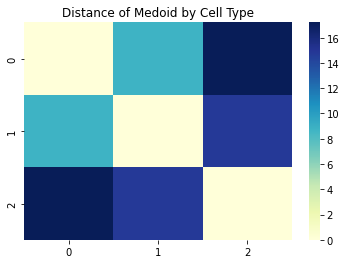

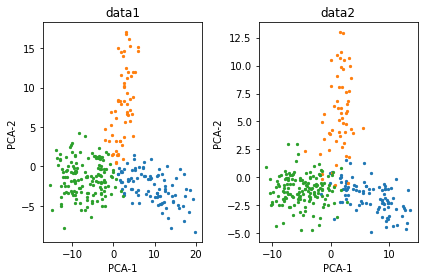

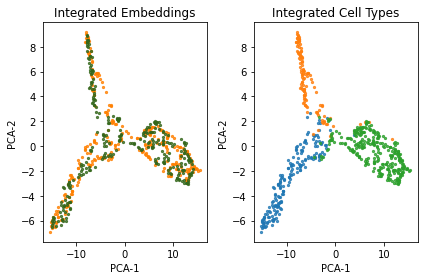

In [8]:
uc.test_LabelTA(uc_data, [type1,type2])
uc.test_closer(uc_data)
l,d = uc.test_label_dist(uc_data, [type1,type2])

l = [type_func(i) for i in l]
ax = sns.heatmap(d, xticklabels=l, yticklabels=l, linewidth=0, cmap='YlGnBu')
plt.title('Distance of Medoid by Cell Type')
uc.Visualize([data1,data2], uc_data, [type1,type2], mode='PCA')